In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk


In [3]:
# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                        1000.0])

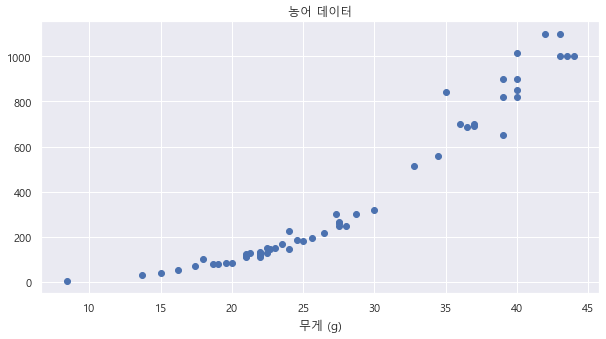

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(x=perch_length,y=perch_weight)
plt.xlabel('길이 (cm)')
plt.xlabel('무게 (g)')
plt.title('농어 데이터')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [7]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [8]:
# train_input = np.row_stack((train_input))
# train_input.shape

In [9]:
# test_input = np.row_stack((test_input))
# test_input.shape

In [15]:
# 2차원으로 형태변환
train_input = train_input.reshape(-1,1)

In [16]:
train_input.shape

(42, 1)

In [11]:
# 2차원으로 형태변환
test_input = np.row_stack((test_input))
test_input.shape

(14, 1)

### 결정계수 ($R^2$)
- Tex 문법

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knr = KNeighborsRegressor()
# KNN 훈련
knr.fit(X=train_input,y=train_target) # 2차원 데이터를 입력해야 한다

KNeighborsRegressor()

In [21]:
# 테스트 값도 2차원 배열
knr.score(X=test_input,y=test_target)
# 결정계수 = 0.9928

0.992809406101064

### MAE
Mean Abolute Error

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
test_pred = knr.predict(test_input)

In [28]:
# 테스트 타깃세트에 대한 평균 절대값 오차를 계산
mae = mean_absolute_error(y_true=test_target,y_pred=test_pred)
print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19.15g 정도 타깃값과 다르게 예측 되었음

In [29]:
knr.score(train_input,train_target)

0.9698823289099254

#### 과대적합 ( overfitting )
- 훈련세트로 나온 결정계수는 매우 좋으나 테스트에서 나온 결정계수가 매우 나쁠때
- 두 값(train_input-train_target / test_input-test_target)의 score가 너무 크게 차이나지 않아야 한다

### 현재의 과소적합 문제를 해결할 방법
모델을 조금더 복잡하게 만들면 됨

In [33]:
# 최근접 이웃의 갯수를 3래로 줄임
knr.n_neighbors = 3

# 재훈련
knr.fit(X=train_input,y=train_target)
knr.score(X=test_input,y=test_target)

0.9746459963987609

In [34]:
knr.score(X=train_input,y=train_target)
# 과소적합 문제를 해결함

0.9804899950518966

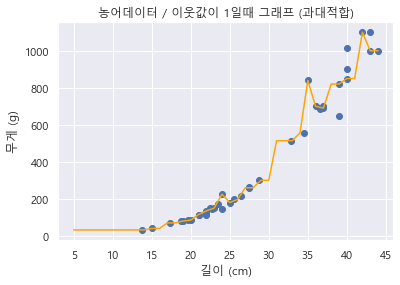

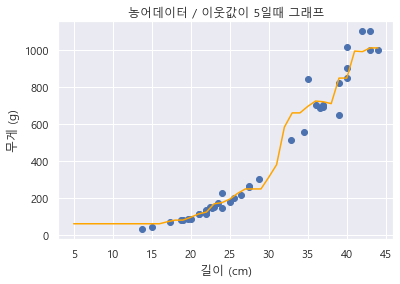

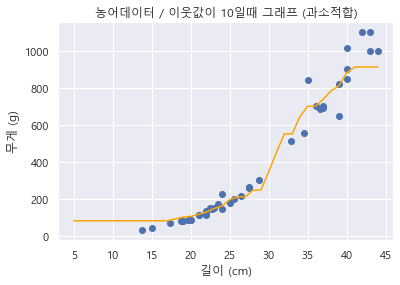

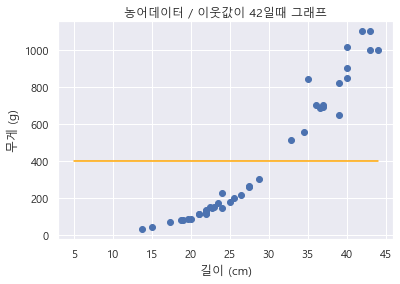

In [41]:
knr = KNeighborsRegressor()

x = np.arange(5,45).reshape(-1,1)

for n in [1,5,10,42]:
    knr.n_neighbors = n
    knr.fit(train_input,train_target)

    pred = knr.predict(X=x)

    plt.scatter(train_input,train_target)
    plt.plot(x,pred,color='orange')
    title = f'농어데이터 / 이웃값이 {n}일때 그래프'
    if n == 1:
        title += ' (과대적합)'
    elif n == 10:
        title += ' (과소적합)'
    plt.title(title)
    plt.xlabel('길이 (cm)')
    plt.ylabel('무게 (g)')
    plt.show()